In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PHYSICAL_THREADS = 8

In [2]:
serial_data = pd.read_csv("datasets/data-Serial.csv").to_numpy()
spmd_data = pd.read_csv("datasets/data-SPMD.csv").to_numpy()
sstatic_data = pd.read_csv("datasets/data-SStatic.csv").to_numpy()
sdynamic_data = pd.read_csv("datasets/data-SDynamic.csv").to_numpy()
sguided_data = pd.read_csv("datasets/data-SGuided.csv").to_numpy()
sauto_data = pd.read_csv("datasets/data-SAuto.csv").to_numpy()

threads_array = np.arange(PHYSICAL_THREADS)

algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)', 
     'Code 2 (Static)',
     'Code 3 (Dynamic)',
     'Code 4 (Guided)',
     'Code 5 (Auto)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'Static', 'Dynamic', 'Guided', 'Auto']
rows = pd.MultiIndex.from_tuples([(thread, code) for thread in threads_array for code in codes], names=['ThreadQty', ''])
algorithm_metrics = pd.DataFrame(index=rows, columns=columns)

#### Secuential Algorithm Data

In [3]:
secuential_data = pd.DataFrame(columns=['Code 0 (Serial)'])
secuential_data.loc['1'] = np.mean(serial_data)
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
secuential_data

Secuential Algorithm Execution Time:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 0 (Serial)
1,2.665482


#### Parallel Algorithms Data

In [4]:
for index in range(len(spmd_data)):
    algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        np.mean(spmd_data[index]), 
        np.mean(sstatic_data[index]),
        np.mean(sdynamic_data[index]),
        np.mean(sguided_data[index]),
        np.mean(sauto_data[index])
    ]
    
algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mParallel Algorithm Analysis:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
algorithm_data

Parallel Algorithm Analysis:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (Static),Code 3 (Dynamic),Code 4 (Guided),Code 5 (Auto)
ThreadQty,,,,,
0,2.663223,2.693844,2.760900,2.778721,2.801395
1,2.318804,2.324416,1.437579,1.454421,1.474072
2,1.782828,1.653815,0.995538,1.000387,1.015925
3,1.378450,1.296813,0.793762,0.793755,0.795986
4,1.384665,1.319905,0.713499,0.680265,0.704866
5,1.230450,1.138602,0.656042,0.647436,0.673452
6,1.155588,1.045774,0.648130,0.704892,0.655557
7,1.023457,0.907678,0.682217,0.661019,0.696835


#### Algorithm Metrics

In [5]:
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(algorithm_data.iat[0, j] / algorithm_data.iat[index, j],3)

        algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                               
0         SPMD     1.000848     37.58%               1.0
          Static   0.989472     36.73%               1.0
          Dynamic   0.96544     34.97%               1.0
          Guided   0.959248     34.52%               1.0
          Auto     0.951484     33.96%               1.0
1         SPMD     1.149507     49.57%             1.149
          Static   1.146732     49.33%             1.159
          Dynamic  1.854146    128.98%             1.921
          Guided   1.832676    126.01%             1.911
          Auto     1.808244    122.67%               1.9
2         SPMD     1.495086     83.86%             1.494
          Static   1.611717     97.45%             1.629
          Dynamic  2.677429    268.94%             2.773
          Guided   2.664451    266.34%             2.778
          Auto       2.6237    258.26%             2.757
3         SPMD     1.933681    140.28%             1.932
          Static    2.05541     158.5%             2.077
          Dynamic  3.358037    423.05%             3.478
          Guided   3.358066    423.06%             3.501
          Auto     3.348654    420.69%             3.519
4         SPMD     1.925001    139.02%             1.923
          Static    2.01945     153.0%             2.041
          Dynamic  3.735789    523.59%              3.87
          Guided   3.918299     576.0%             4.085
          Auto     3.781544    536.49%             3.974
5         SPMD     2.166266    176.05%             2.164
          Static   2.341013     205.6%             2.366
          Dynamic  4.062975    619.32%             4.208
          Guided   4.116981    635.89%             4.292
          Auto     3.957939    587.71%              4.16
6         SPMD     2.306602     199.6%             2.305
          Static   2.548813    243.73%             2.576
          Dynamic  4.112573    634.53%              4.26
          Guided   3.781405    536.45%             3.942
          Auto     4.065981    620.23%             4.273
7         SPMD     2.604391    254.47%             2.602
          Static   2.936594    323.53%             2.968
          Dynamic  3.907088     572.7%             4.047
          Guided   4.032383    610.03%             4.204
          Auto     3.825126    548.93%              4.02

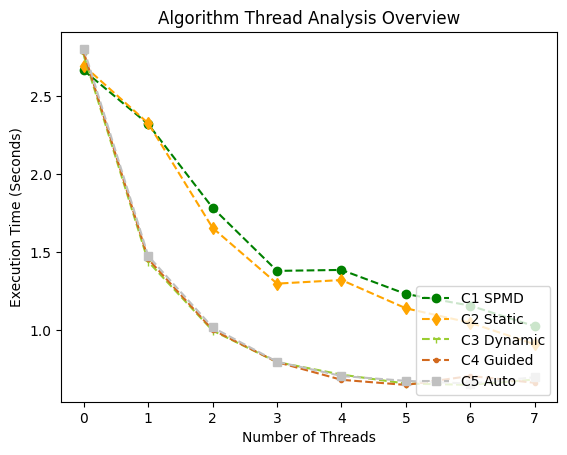

In [6]:
plt.title("Algorithm Thread Analysis Overview")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, algorithm_data.get('Code 2 (Static)'), 'd--', label="C2 Static", color='orange')
plt.plot(threads_array, algorithm_data.get('Code 3 (Dynamic)'), '1--', label="C3 Dynamic", color='yellowgreen')
plt.plot(threads_array, algorithm_data.get('Code 4 (Guided)'), '.--', label="C4 Guided", color='chocolate')
plt.plot(threads_array, algorithm_data.get('Code 5 (Auto)'), 's--', label="C5 Auto", color='silver')
plt.legend(loc="lower right")
plt.xticks(threads_array)
plt.show()